# Combo - ARIMA plus RF model

'arimaforecastsedit.csv' is produced in 'timeseriestest.ipynb'

Random forest model is produced in a script I have lost access to but was quite a straightforward application of sklearn random forest

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import load


In [3]:
arimadf = pd.read_csv('arimaforecastsedit.csv')
testdf = pd.read_csv('glmU.csv')

In [4]:
print(arimadf.shape)

(328, 3)


In [5]:
print(testdf.shape)

(328, 4)


'predyn' is just a binary identifier indicating whether each row is predicted by ARIMA (1) or from the original data (0). Here I have just used it to separate the generations as the first half of each is 0 and the latter half is 1.

In [6]:
gens = []
gen = 0
predyn = 0
for _,row in arimadf.iterrows():
    if row['predyn'] == 1:
        predyn = 1
    elif row['predyn'] == 0:
        if predyn != row['predyn']:
            gen+=1
        predyn = 0
    gens.append(gen)

arimadf['generation'] = gens



In [7]:
print(arimadf['generation'])

0      0
1      0
2      0
3      0
4      0
      ..
323    5
324    5
325    5
326    5
327    5
Name: generation, Length: 328, dtype: int64


arimaClass and testClass were made using the RF model on ARIMA forecasts and original data. The 'class' column is the RF binary predictions on whether the cell divides (1) at this point.

RF trained on full dataset of knockout data on BC4

In [8]:
arimaClass = pd.read_csv("arimaClassification.csv")
testClass = pd.read_csv("testClassification.csv")

formatted data in a CSV for the below plot

In [9]:
arimaPltdf = pd.read_csv("arimaplt.csv")

In [10]:
def findLabel(df, cell1='class'):
    vals = []
    times = []
    for _, row in df.iterrows():  # Added parentheses after df.iterrows
        if row[cell1] == 1:
            vals.append(row['cellMass'])
            times.append(row['time'])
    return vals, times

arimaVals, arimaTimes = findLabel(arimaClass)
testVals, testTimes = findLabel(testClass)
trueVals, trueTimes = findLabel(testClass, cell1='label')


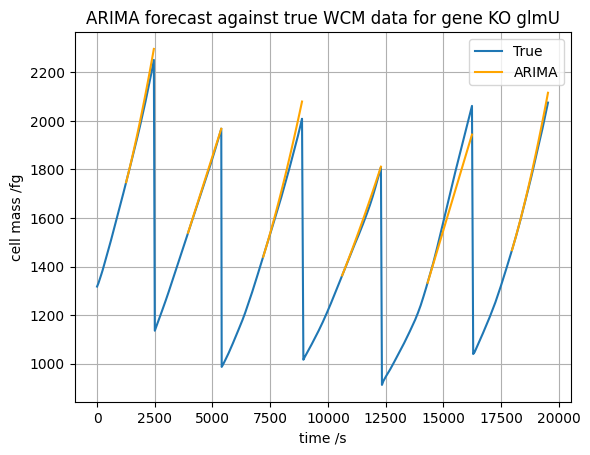

In [17]:
plt.figure()
plt.plot(testClass['time'], testClass['cellMass'], label='True')
plt.plot(arimaPltdf['0 time'], arimaPltdf['0 pred'], label='ARIMA', color='orange')
for i in range(1,6):
    plt.plot(arimaPltdf[f'{i} time'], arimaPltdf[f'{i} pred'], color='orange')
# plt.scatter(testTimes, testVals, label = 'test division', marker='.', color='red')
# plt.scatter(arimaTimes, arimaVals, label = 'ARIMA division', marker='*', color='green')
# plt.scatter(trueTimes, trueVals, label = 'True division', marker='x', color='black')
plt.legend()
plt.xlabel('time /s')
plt.grid(True)
plt.ylabel('cell mass /fg')
plt.title("ARIMA forecast against true WCM data for gene KO glmU")
plt.savefig("glmuARIMA6gen.pdf", format='pdf', bbox_inches='tight')

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

compdf = pd.read_csv("formetrics.csv")
print(compdf.shape)
compdf.dropna(how='any')
print(compdf.shape)
cellMass = compdf['cellMass']
arima = compdf['arima']
mse = mean_squared_error(cellMass, arima)
mae = mean_absolute_error(cellMass, arima)
mape = mean_absolute_percentage_error(cellMass, arima)

metricsDict = {'MSE': mse, 'MAE': mae, 'MAPE': mape}
metricsFrame = pd.DataFrame(metricsDict, index=[0])  # Set index explicitly

print(metricsFrame)

(164, 3)
(164, 3)
           MSE        MAE     MAPE
0  1341.820334  23.803995  0.01292


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Calculate mean squared error
mse = mean_squared_error(testClass['cellMass'], arimaPltdf['0 pred'])

# Calculate mean absolute error
mae = mean_absolute_error(testClass['cellMass'], arimaPltdf['0 pred'])

# Calculate mean absolute percentage error
mape = mean_absolute_percentage_error(testClass['cellMass'], arimaPltdf['0 pred'])

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)


ValueError: Found input variables with inconsistent numbers of samples: [328, 33]

plotting classification predictions vs actual cell division

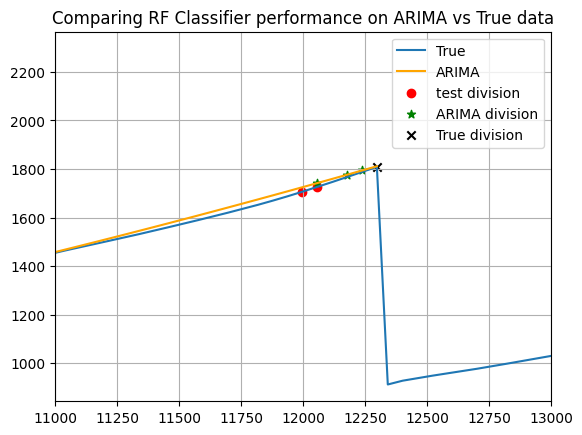

In [15]:
plt.figure()
plt.xlim(11000, 13000)
plt.plot(testClass['time'], testClass['cellMass'], label='True')
plt.plot(arimaPltdf['0 time'], arimaPltdf['0 pred'], label='ARIMA', color='orange')
for i in range(1,5):
    plt.plot(arimaPltdf[f'{i} time'], arimaPltdf[f'{i} pred'], color='orange')
plt.scatter(testTimes, testVals, label = 'test division', marker='o', color='red')
plt.scatter(arimaTimes, arimaVals, label = 'ARIMA division', marker='*', color='green')
plt.scatter(trueTimes, trueVals, label = 'True division', marker='x', color='black')
plt.legend()
plt.grid(True)
plt.title("Comparing RF Classifier performance on ARIMA vs True data")
plt.savefig("glmUdivision.pdf", format='pdf', bbox_inches='tight')

In [94]:
from sklearn.metrics import classification_report
div = pd.read_csv("divmetrics.csv")

# Get classification metrics for arimaclass against label
arimaclass_metrics = classification_report(div['arimaClass'], div['label'])
print("Metrics for arimaclass against label:")
print(arimaclass_metrics)

# Get classification metrics for class against label
class_metrics = classification_report(div['class'], div['label'])
print("Metrics for class against label:")
print(class_metrics)


Metrics for arimaclass against label:
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       104
           1       0.67      0.07      0.12        60

    accuracy                           0.65       164
   macro avg       0.66      0.52      0.45       164
weighted avg       0.65      0.65      0.54       164

Metrics for class against label:
              precision    recall  f1-score   support

           0       0.66      0.98      0.79       106
           1       0.67      0.07      0.12        58

    accuracy                           0.66       164
   macro avg       0.66      0.53      0.46       164
weighted avg       0.66      0.66      0.55       164

